# **Feature Engineering Notebook**

## Objectives

* Engineer features for Regression

## Inputs

* inputs/datasets/cleaned/TrainSet.csv
* inputs/datasets/cleaned/TestSet.csv

## Outputs

* generate a list with variables to engineer

## Overview

This notebook covers the full feature engineering process applied to the cleaned housing dataset. Feature engineering is a critical step in preparing the data for machine learning, as it transforms raw variables into a format that improves the model’s ability to learn patterns. 

We will address:
- Enconding of categorical features
- Normalization of skewed numerical features
- Evaluation of transformation effects via visualization


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with `os.getcwd()`

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Arthur\\OneDrive\\Documentos\\Code Institute\\PP5\\PP5-heritage-housing-issues-ml\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* `os.path.dirname()` gets the parent directory
* `os.chir()` defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
print("New working directory set to:", os.getcwd())

New working directory set to: c:\Users\Arthur\OneDrive\Documentos\Code Institute\PP5\PP5-heritage-housing-issues-ml


---

# Load Cleaned Dataset

Train Set

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path, keep_default_na=False)
TrainSet.head(23)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1314,0.0,3.0,No,922,Rec,392,294,RFn,1957.0,...,8400,70.0,0.0,0,6,5,1314,1957,1957,145000
1,799,772.0,3.0,No,0,Unf,799,380,RFn,1993.0,...,7837,59.0,0.0,40,7,6,799,1993,1994,178000
2,796,0.0,2.0,No,0,Unf,796,0,None,0.0,...,8777,67.0,0.0,0,7,5,796,1910,1950,85000
3,981,787.0,3.0,No,569,ALQ,162,240,Unf,1939.0,...,7200,60.0,252.0,0,7,5,731,1937,1950,175000
4,1026,665.0,3.0,No,218,LwQ,808,308,Unf,1924.0,...,5000,50.0,0.0,0,6,5,1026,1924,1950,127000
5,894,0.0,3.0,No,894,ALQ,0,552,Unf,1975.0,...,9800,70.0,0.0,0,7,5,894,1972,1972,149900
6,684,876.0,3.0,Av,0,Unf,684,400,Fin,2005.0,...,11911,122.0,0.0,38,5,6,684,2005,2005,174000
7,796,358.0,3.0,No,735,BLQ,61,240,Unf,1922.0,...,5436,40.0,0.0,96,8,4,796,1922,2007,125500
8,1422,0.0,3.0,No,588,None,606,576,Fin,1981.0,...,12090,78.0,210.0,0,6,6,1422,1981,1981,175500
9,1496,0.0,3.0,Av,0,Unf,1496,474,None,2007.0,...,9158,76.0,140.0,130,5,8,1496,2007,2007,225000


Test Set

In [18]:
import pandas as pd
test_set_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path, keep_default_na=False)
TestSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1068,0.0,3.0,No,663,GLQ,396,264,RFn,1963.0,...,8414,70.0,0.0,0,8,6,1059,1963,2003,154500
1,1500,0.0,3.0,Av,1032,GLQ,431,712,RFn,1994.0,...,12256,98.0,362.0,32,5,8,1463,1994,1995,325000
2,1028,0.0,2.0,No,0,Unf,1008,360,Unf,1927.0,...,8960,56.0,0.0,0,6,5,1008,1927,1950,115000


---

# Data Exploration

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Feature Engineering

## Evaluate Distribution Transformations

Now we assess whether **distribution transformations** (e.g. log, Yeo-Johnson) could help normalize features and benefit certain algorithms.

We'll use a custom utility `FeatureEngineeringAnalysis` to preview the effect of various transformations.


### Custom Function

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore') # ignore warnings for cleaner output

%matplotlib inline


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()
    print(f"skewness: {df[variable].skew().round(2)} | kurtosis: {df[variable].kurtosis().round(2)}")
    


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


### Categorical Encoding - Ordinal: replaces categories with ordinal numbers

* Step 1: Select variable(s)

In [8]:
categorical_features = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
print("Categorical features:", categorical_features)

Categorical features: ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']


* Step 2: Create a separate DataFrame, with your variable(s)

In [9]:
df_engineering = TrainSet[categorical_features].copy()
df_engineering.head(15)

,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual
0,No,Rec,RFn,TA
1,No,Unf,RFn,TA
2,No,Unf,None,TA
3,No,ALQ,Unf,Gd
4,No,LwQ,Unf,Gd
5,No,ALQ,Unf,TA
6,Av,Unf,Fin,Gd
7,No,BLQ,Unf,Gd
8,No,None,Fin,Gd
9,Av,Unf,None,Gd


* Step 3: Create engineered variables(s) by applying the transformation(s), assess engineered variables distribution and select the most suitable method for each variable.

* Variable Analyzed: BsmtExposure
* Applied transformation: ['BsmtExposure_ordinal_encoder'] 



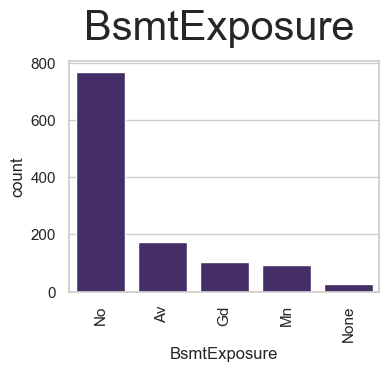

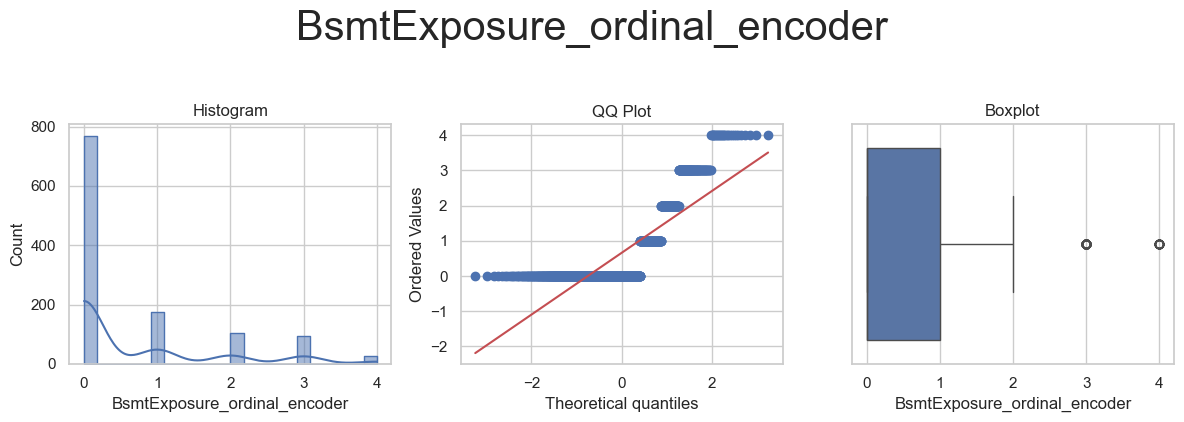



* Variable Analyzed: BsmtFinType1
* Applied transformation: ['BsmtFinType1_ordinal_encoder'] 



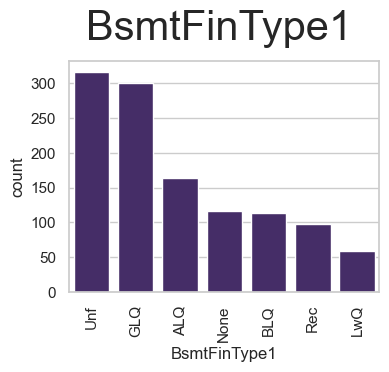

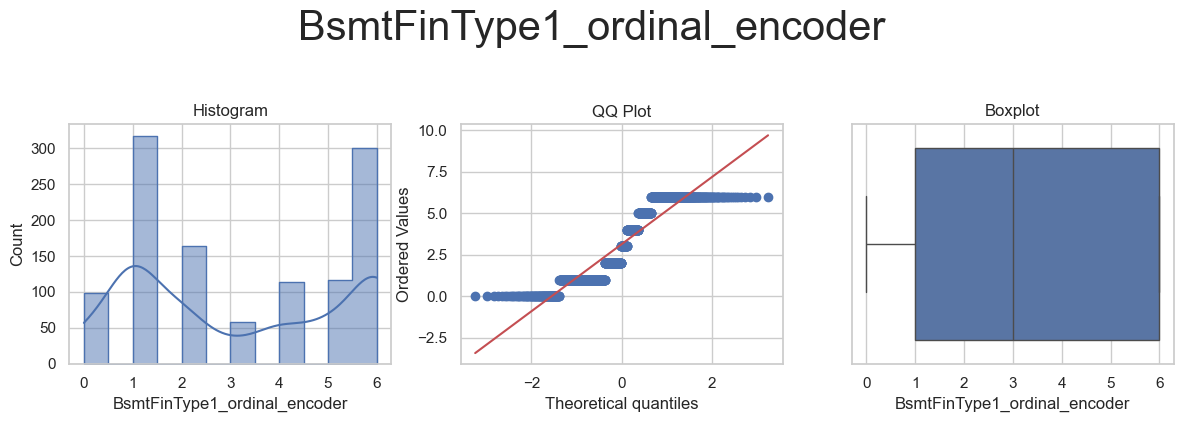



* Variable Analyzed: GarageFinish
* Applied transformation: ['GarageFinish_ordinal_encoder'] 



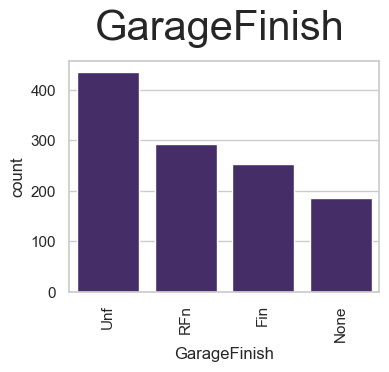

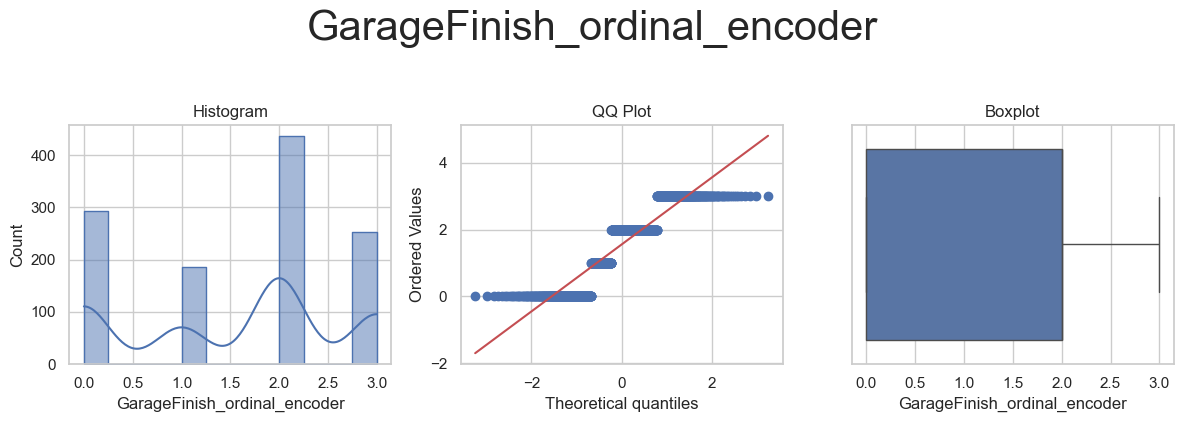



* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



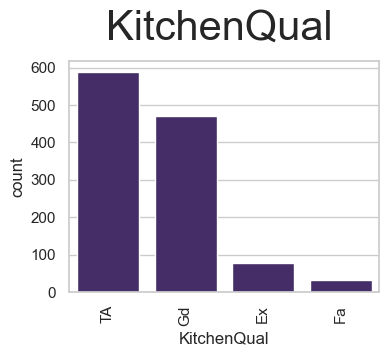

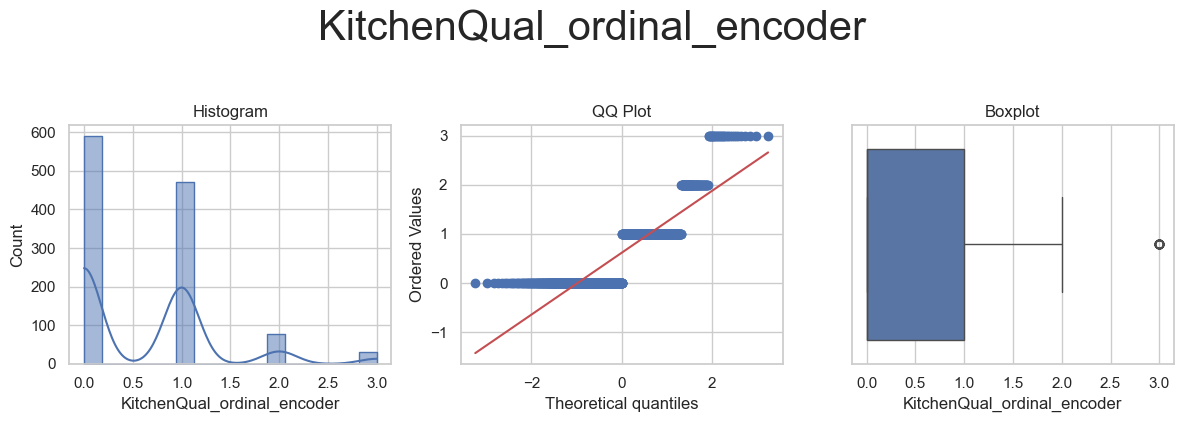

In [13]:
# Pass only the original categorical features to avoid conflicts with already transformed columns
df_engineering = FeatureEngineeringAnalysis(df=df_engineering[categorical_features], analysis_type='ordinal_encoder')

For all variables, the transformation is effective, since it converted categories to numbers.

* Step 4 - Apply the selected transformation to the Train and Test set
    1. Create a transformer
    2. Fit_transform into TrainSet
    3. Transform into TestSet 

In [20]:
# Ensure the categorical features are of type 'object' or 'category'
TrainSet[categorical_features] = TrainSet[categorical_features].astype('object')
TestSet[categorical_features] = TestSet[categorical_features].astype('object')

encoder = OrdinalEncoder(encoding_method='arbitrary', variables=categorical_features)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("Categorical encoding - ordinal transformation done!")

Categorical encoding - ordinal transformation done!


### Numerical Transformation

#### Select Features to Analyze

In [28]:
numerical_features = [col for col in TrainSet.columns if col not in categorical_features]
print(numerical_features)

['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


Create a separate Dataframe with the selected variables

In [30]:
df_engineering = TrainSet[numerical_features].copy()
df_engineering.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1314,0.0,3.0,922,392,294,1957.0,1314,8400,70.0,0.0,0,6,5,1314,1957,1957,145000
1,799,772.0,3.0,0,799,380,1993.0,1571,7837,59.0,0.0,40,7,6,799,1993,1994,178000
2,796,0.0,2.0,0,796,0,0.0,796,8777,67.0,0.0,0,7,5,796,1910,1950,85000
3,981,787.0,3.0,569,162,240,1939.0,1768,7200,60.0,252.0,0,7,5,731,1937,1950,175000
4,1026,665.0,3.0,218,808,308,1924.0,1691,5000,50.0,0.0,0,6,5,1026,1924,1950,127000
5,894,0.0,3.0,894,0,552,1975.0,894,9800,70.0,0.0,0,7,5,894,1972,1972,149900
6,684,876.0,3.0,0,684,400,2005.0,1560,11911,122.0,0.0,38,5,6,684,2005,2005,174000
7,796,358.0,3.0,735,61,240,1922.0,1154,5436,40.0,0.0,96,8,4,796,1922,2007,125500
8,1422,0.0,3.0,588,606,576,1981.0,1422,12090,78.0,210.0,0,6,6,1422,1981,1981,175500
9,1496,0.0,3.0,0,1496,474,2007.0,1496,9158,76.0,140.0,130,5,8,1496,2007,2007,225000


Plotting the graphs for each variable might take a long time and it could be useful to break it into two parts. The first part is comprised of the features highly correlated with SalePrice from our correlation analysis:

|  Variable      |
|----------------|
| `GrLivArea`    |
| `GarageArea`   |
| `TotalBsmtSF`  |
|  `1stFlrSF`    |
| `OverallQual`  |
|  `GarageYrBlt` |
|  `KitchenQual` |
| `YearRemodAdd` |
|   `YearBuilt`  |

Select Variables

In [21]:
top_numerical_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'OverallQual', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt']

Create engineered variables by applying the transformations, assess engineered variables distribution and select the most suitable method

In [35]:
df_engineering_top = df_engineering[top_numerical_features].copy()
df_engineering_top.head(10)

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,OverallQual,GarageYrBlt,YearRemodAdd,YearBuilt
0,1314,294,1314,1314,5,1957.0,1957,1957
1,1571,380,799,799,6,1993.0,1994,1993
2,796,0,796,796,5,0.0,1950,1910
3,1768,240,731,981,5,1939.0,1950,1937
4,1691,308,1026,1026,5,1924.0,1950,1924
5,894,552,894,894,5,1975.0,1972,1972
6,1560,400,684,684,6,2005.0,2005,2005
7,1154,240,796,796,4,1922.0,2007,1922
8,1422,576,1422,1422,6,1981.0,1981,1981
9,1496,474,1496,1496,8,2007.0,2007,2007


In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering_top, analysis_type='numerical')

And now we do the same with the rest of the numerical features

In [44]:
df_engineering = TrainSet[numerical_features].copy()
df_engineering.head(10)

# Select columns that are not in top_numerical_features
df_engineering_bottom = df_engineering[[col for col in df_engineering.columns if col not in top_numerical_features]].copy()
df_engineering_bottom.head(10)

,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,SalePrice
0,0.0,3.0,922,392,8400,70.0,0.0,0,6,145000
1,772.0,3.0,0,799,7837,59.0,0.0,40,7,178000
2,0.0,2.0,0,796,8777,67.0,0.0,0,7,85000
3,787.0,3.0,569,162,7200,60.0,252.0,0,7,175000
4,665.0,3.0,218,808,5000,50.0,0.0,0,6,127000
5,0.0,3.0,894,0,9800,70.0,0.0,0,7,149900
6,876.0,3.0,0,684,11911,122.0,0.0,38,5,174000
7,358.0,3.0,735,61,5436,40.0,0.0,96,8,125500
8,0.0,3.0,588,606,12090,78.0,210.0,0,6,175500
9,0.0,3.0,0,1496,9158,76.0,140.0,130,5,225000


In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering_bottom, analysis_type='numerical')

### How We Chose Which Transformations to Apply

Each numerical variable was evaluated across multiple transformation methods using three visual diagnostics:
- **Histogram**: checked for symmetry and bell-shaped distribution
- **QQ Plot**: checked alignment with the diagonal (indicating normality)
- **Boxplot**: checked for outlier compression and spread

We also observe the difference in skewness and kurtosis from original and transformed variables.

We selected the transformation that reduced skewness and kurtosis, and yielded the best visual improvement while preserving interpretability. Below is a summary of the selected transformations:

| Variable         | Transformation Applied  |
|------------------|-------------------------|
| `1stFlrSF`       | `yeo_johnson`           |
| `2ndFlrSF`       | none                    |
| `BedroomAbvGr`   | `yeo_johnson`           |
| `BsmtFinSF1`     | `power`                 |
| `BsmtUnfSF`      | `power`                 |
| `GarageArea`     | none                    |
| `GarageYrBlt`    | none                    |
| `GrLivArea`      | `yeo_johnson`           |
| `LotArea`        | `log/yeo_johnson`       |
| `LotFrontage`    | `yeo_johnson`           |
| `MasVnrArea`     | `power`                 |
| `OpenPorchSF`    | `power`                 |
| `OverallCond`    | `yeo_johnson`           |
| `OverallQual`    | none                    |
| `SalePrice`      | `yeo_johnson`           |
| `TotalBsmtSF`    | `yeo_johnson`           |
| `YearBuilt`      | none                    |
| `YearRemodAdd`   | none                    |

Transformations not selected (like `reciprocal` or `box_cox`) were either less interpretable or introduced new artifacts.




### SmartCorrelatedSelection Variables

* Step 1: for this transformer, we don't need to select variables, since we need all of them.

* Step 2: Create a separate DataFrame, with your variable(s)

In [46]:
df_engineering = TrainSet.copy()
df_engineering.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1314,0.0,3.0,0,922,0,392,294,0,1957.0,...,8400,70.0,0.0,0,6,5,1314,1957,1957,145000
1,799,772.0,3.0,0,0,1,799,380,0,1993.0,...,7837,59.0,0.0,40,7,6,799,1993,1994,178000
2,796,0.0,2.0,0,0,1,796,0,1,0.0,...,8777,67.0,0.0,0,7,5,796,1910,1950,85000
3,981,787.0,3.0,0,569,2,162,240,2,1939.0,...,7200,60.0,252.0,0,7,5,731,1937,1950,175000
4,1026,665.0,3.0,0,218,3,808,308,2,1924.0,...,5000,50.0,0.0,0,6,5,1026,1924,1950,127000


* Step 3: Create engineered variables applying the transformation

In [60]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageArea', 'GarageYrBlt', 'SalePrice'},
 {'OverallQual', 'YearBuilt'}]

And them we extract the features indicated to be dropped by the SmartCorrelatedSelection

In [61]:
corr_sel.features_to_drop_

['1stFlrSF', '2ndFlrSF', 'GarageArea', 'GarageYrBlt', 'OverallQual']

# Conclusions and Next Steps

### Key Outcomes
- All missing values were imputed using context-appropriate strategies.
- A selection of transformations was done via visual diagnostics (histogram, QQ plot, boxplot). Several numerical features were temporarily transformed using techniques like `log`, `power`, and `yeo-johnson` and then analysed if they successful in reducing skewness and improving normality
- SmartCorrelatedSelection indicated several features to be dropped with a threshold of 0.6

    |Features to be dropped|
    |:------------:|
    |`1stFlrSF`|
    |`2ndFlrSF`|
    |`GarageArea`|
    |`GarageArea`|
    |`GarageYrBlt`|
    |`OverallQual`|

### Next Steps

- Conduct feature scaling if required (depending on the chosen algorithm).
- Train baseline models and compare performance (e.g., Linear Regression, Random Forest).
- Apply feature importance analysis post-modeling to validate choices made during feature engineering.